In [1]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#=========== general settings ============================#
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.subplot.wspace"] = 0.4

plt.rcParams['font.family'] ='sans-serif'#使用するフォント
plt.rcParams['font.sans-serif'] ='Arial'#使用するフォント
plt.rcParams["font.size"] = 30
#plt.rcParams['mathtext.rm'] ='sans'#使用するフォント
#plt.rcParams['mathtext.default'] ='rm'#使用するフォント

plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams["xtick.major.pad"] = 19.0
plt.rcParams["ytick.major.pad"] = 16.0
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["ytick.major.size"] = 10

plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
plt.rcParams["axes.labelpad"] = 10
#==================================================================#

In [68]:
def ASR( G, K, s11, s22, s33, s12, s13, s23, p0,ts, tv):
    #n = np.matrix([[n11,n12,n13,n14,n15,n16, n17, n18, n19],[n21,n22,n23,n24,n25,n26, n27, n28, n29],[n31,n32,n33,n34,n35,n36, n37, n38, n39]])
    t = 5
    nn = np.matrix([[1],[0],[0]]) 
    n = nn / np.linalg.norm(nn)

    Jav = (1-np.exp(-t/tv))/(3*K*10**3)
    Jas = (1-np.exp(-t/ts))/(2*G*10**3)
    
    nTn = (s11*n[0]*n[0] + s22*n[1]*n[1] + s33*n[2]*n[2]
           + 2*s12*n[0]*n[1] + 2*s23*n[1]*n[2] + 2*s13*n[0]*n[2]
          )
    
    sm = (1.0/3.0)*(s11 + s22 + s33)
  
    es = (nTn - sm)*Jas
    ev = (sm - p0)*Jav
    
    e = es + ev
    
    return e*10**6

In [69]:
problem = {
    'num_vars': 11,
    'names': [ 'G', 'K','s11', 's22', 's33', 's12', 's13', 's23', 'p0',  'ts', 'tv'],
    'bounds': [[0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 50],
               [0, 50]
               ]
}

In [74]:
param_values = saltelli.sample(problem, 100000)

In [75]:
Y = np.zeros([param_values.shape[0]])

for i, (G, K, s11, s22, s33, s12, s13, s23, p0, ts, tv) in enumerate(param_values):
    Y[i] = ASR(G, K,s11, s22, s33, s12, s13, s23, p0,  ts, tv)
        
Si = sobol.analyze(problem, Y, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
G -0.027179 0.469490 0.797244 0.861425
K -0.194846 0.281434 0.458758 0.231734
s11 0.000829 0.000473 0.617238 0.605918
s22 -0.000053 0.000115 0.517282 0.684529
s33 0.000060 0.000119 0.219621 0.217160
s12 0.000000 0.000000 0.000000 0.000000
s13 0.000000 0.000000 0.000000 0.000000
s23 0.000000 0.000000 0.000000 0.000000
p0 0.000296 0.000296 0.479042 0.686547
ts -0.000011 0.000177 0.177008 0.177806
tv 0.000047 0.000268 0.154588 0.115672

Parameter_1 Parameter_2 S2 S2_conf
G K 0.081600 0.500871
G s11 0.471036 0.677157
G s22 0.010558 0.527858
G s33 0.119427 0.532635
G s12 0.081373 0.500877
G s13 0.081373 0.500877
G s23 0.081373 0.500877
G p0 0.081477 0.500854
G ts 0.085764 0.632616
G tv 0.081208 0.500865
K s11 0.316201 0.369321
K s22 0.262865 0.385098
K s33 0.444415 0.395750
K s12 0.309096 0.322829
K s13 0.309096 0.322829
K s23 0.309096 0.322829
K p0 0.646215 0.576653
K ts 0.309024 0.322779
K tv 0.175010 0.437495
s11 s22 -0.000270 0.000366
s11 s33 -0.000443 0.

<BarContainer object of 11 artists>

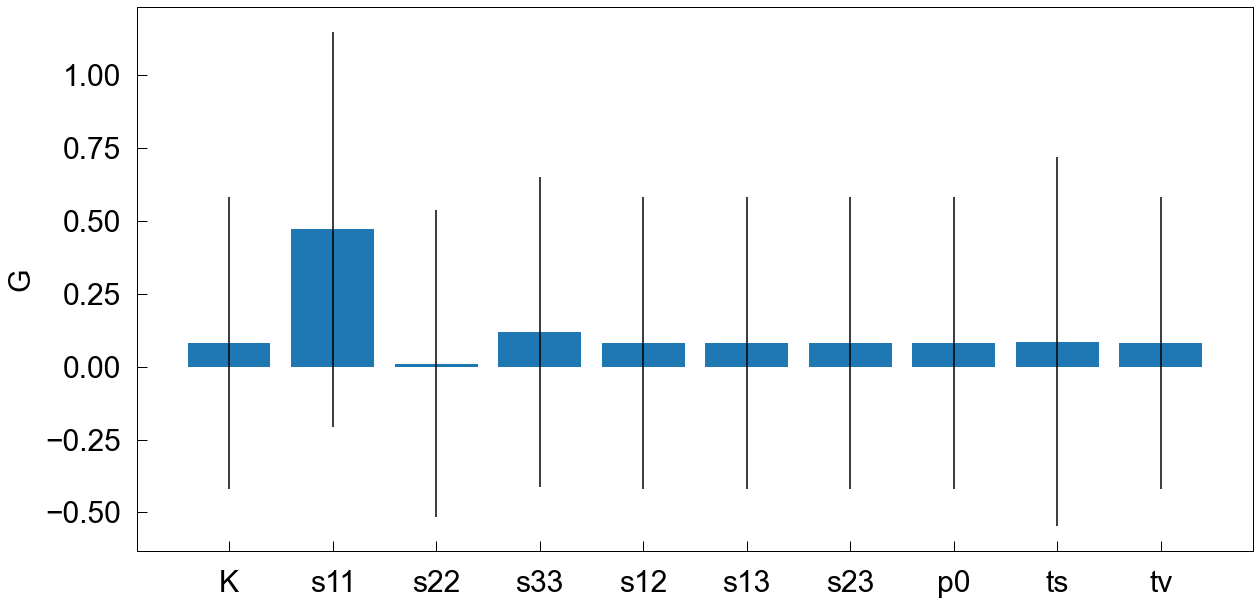

In [76]:
j = 0

x = np.arange(problem['num_vars'])
plt.xticks(x, problem['names'])
plt.ylabel(problem["names"][j])
plt.bar(x, Si['S2'][j], yerr = Si['S2_conf'][j])

<BarContainer object of 11 artists>

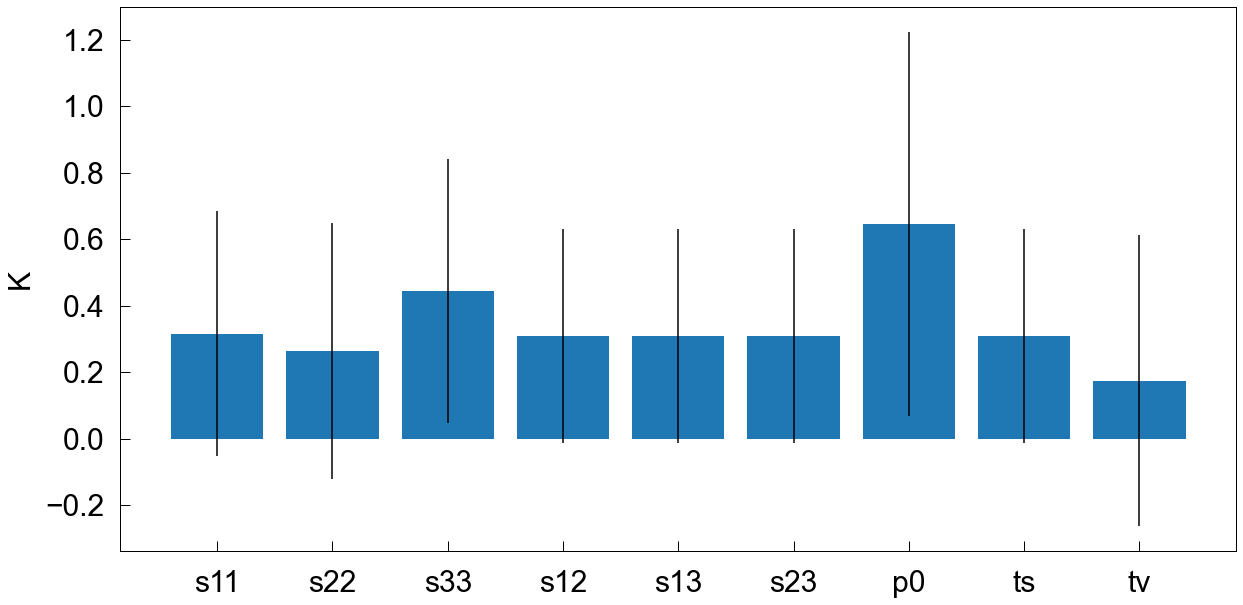

In [77]:
j = 1

x = np.arange(problem['num_vars'])
plt.xticks(x, problem['names'])
plt.ylabel(problem["names"][j])
plt.bar(x, Si['S2'][j], yerr = Si['S2_conf'][j])

<BarContainer object of 11 artists>

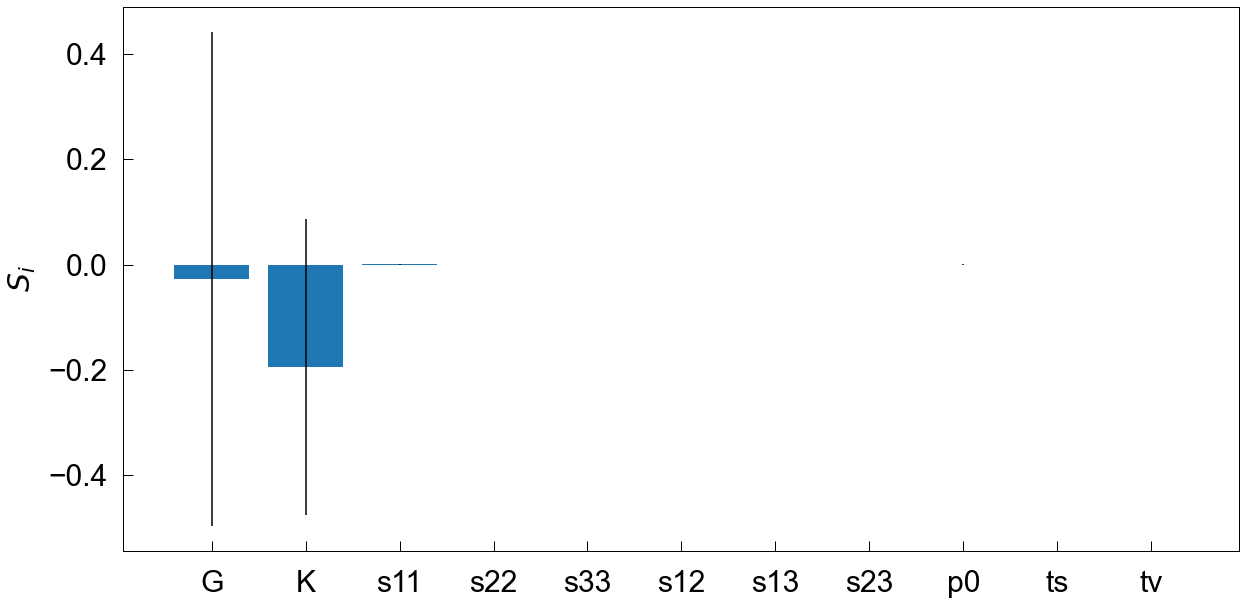

In [78]:
x = np.arange(problem['num_vars'])
plt.xticks(x, problem['names'])
plt.ylabel('$S_{i}$')
plt.bar(x, Si['S1'], yerr = Si['S1_conf'])

<BarContainer object of 11 artists>

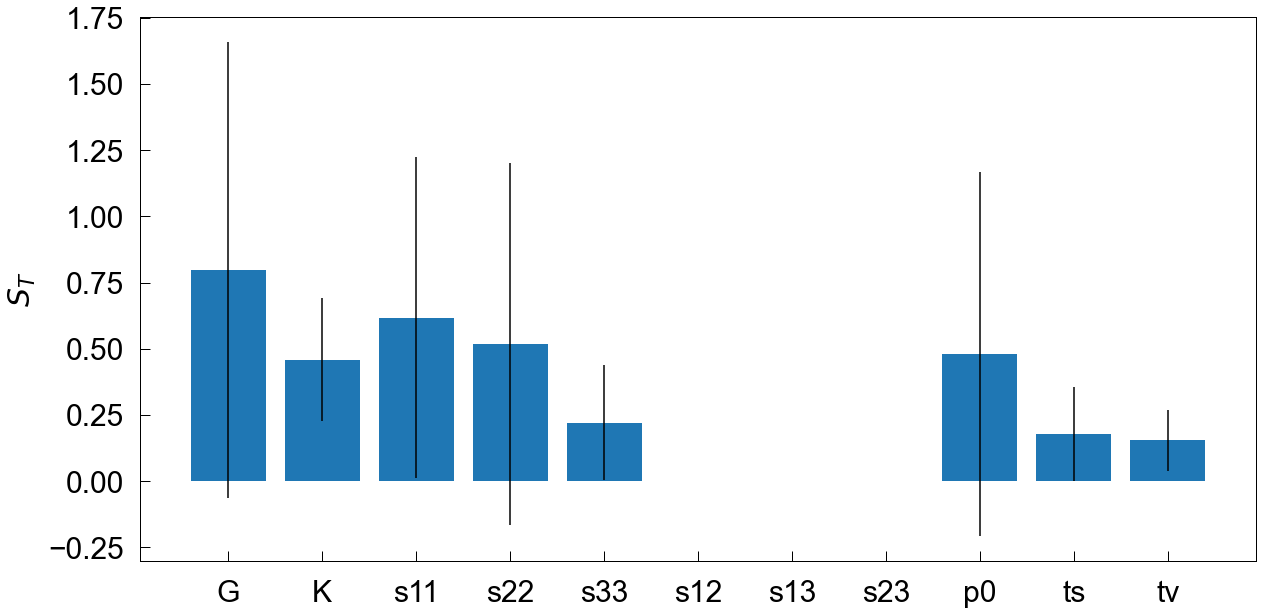

In [79]:
x = np.arange(problem['num_vars'])
plt.xticks(x, problem['names'])
plt.ylabel('$S_{T}$')
plt.bar(x, Si['ST'], yerr = Si['ST_conf'])